In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import typhon
import matplotlib.pyplot as plt
from os.path import join
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
plt.style.use(typhon.plots.styles.get('typhon')) 

In [11]:
runs = ["ceres", "dpp0052", "ifs-nemo"]
run_dirs = {
    "ceres": "/work/mh0926/m300872/ceres/",
    "dpp0052": "/work/mh0926/m300872/cdo/",
    "ifs-nemo": "/mnt/lustre02/work/mh1126/m300773/hackathon/ifs_nemo"
}
run_files = {
    "ceres": "CERES_EBAF-TOA_Ed4.1_Subset_200003-202107_1x1grid.nc",
    "dpp0052": "dpp0052_radiation_2020_1x1.nc",
    "ifs-nemo": "IFS-NEMO-4km_rltacc_1deg.nc"
}
timestep_feb = {
    "ceres": "2020-02-15T00:00:00.000000000",
    "ifs-nemo": "2020-02-15T00:00:00.000000000",
    "dpp0052": "2020-02-15T11:44:59.999884800"
    
}
rlut = {
    "ceres": "toa_lw_all_mon",
    "ifs-nemo": "rlt",
    "dpp0052": "rlut"
}
scaling = {
    "ceres": 1,
    "ifs-nemo": -1,
    "dpp0052": 1
}

In [21]:
# trying to add dpp0016
runs = ["ceres", "dpp0052", "dpp0016", "ifs-nemo"]
run_dirs = {
    "ceres": "/work/mh0926/m300872/ceres/",
    "dpp0052": "/work/mh0926/m300872/cdo/",
    "dpp0016": "/work/mh0926/m300872/cdo/",
    "ifs-nemo": "/mnt/lustre02/work/mh1126/m300773/hackathon/ifs_nemo"
}
run_files = {
    "ceres": "CERES_EBAF-TOA_Ed4.1_Subset_200003-202107_1x1grid.nc",
    "dpp0052": "dpp0052_radiation_2020_1x1.nc",
    "dpp0016": "dpp0016_radiation_2020_1x1.nc",
    "ifs-nemo": "IFS-NEMO-4km_rltacc_1deg.nc"
}
timestep_feb = {
    "ceres": "2020-02-15T00:00:00.000000000",
    "ifs-nemo": "2020-02-15T00:00:00.000000000",
    "dpp0052": "2020-02-15T11:44:59.999884800",
    "dpp0016": "2020-02-15T09:00:00.000000000"
}
rlut = {
    "ceres": "toa_lw_all_mon",
    "ifs-nemo": "rlt",
    "dpp0052": "rlut",
    "dpp0016": "rlut"
}
scaling = {
    "ceres": 1,
    "ifs-nemo": -1,
    "dpp0052": 1,
    "dpp0016": 1
}

In [22]:
#ceres = xr.open_dataset(join(ceres_dir, ceres_file))
ds={}
for run in runs:
    ds[run] = xr.open_dataset(join(run_dirs[run], run_files[run]))
    if (np.result_type(ds[run].time) == 'float64'):
        ds[run]['time'] = [pd.to_datetime(x.values, format='%Y%m%d') + pd.to_timedelta(x.values%1, unit='d') for x in ds[run].time] 

In [23]:
ds['dpp0052'].time

<xarray.DataArray 'time' (time: 3)>
array(['2020-01-25T23:44:59.999884800', '2020-02-15T11:44:59.999884800',
       '2020-03-16T11:44:59.999884800'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-25T23:44:59.999884800 ... 2020-03-...

/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


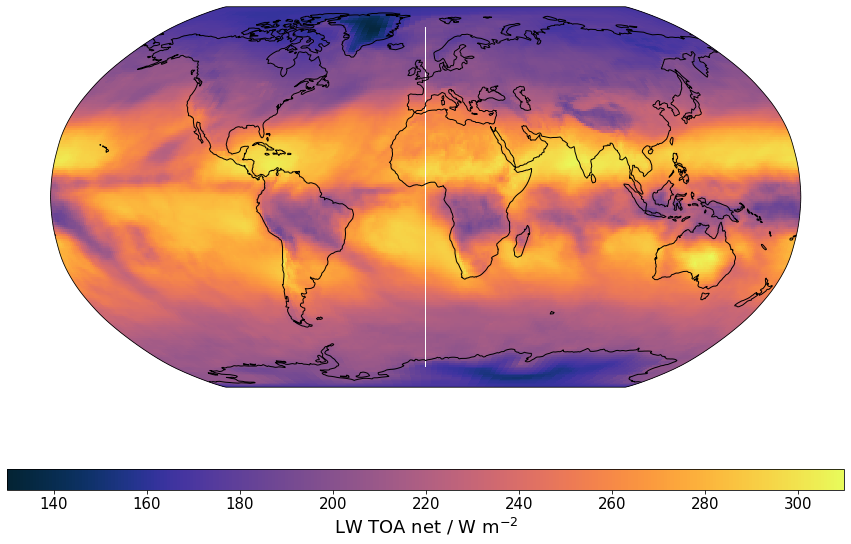

In [24]:
# Plot CERES data
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
lons = ds["ceres"].lon
lats = ds["ceres"].lat
lo, la = np.meshgrid(lons, lats)

im = ax.pcolormesh(lo, la, ds["ceres"].toa_lw_all_mon.sel(time=timestep["ceres"]), cmap='temperature', vmin=130, vmax=310, transform=ccrs.PlateCarree())

x_ticks = np.arange(-180, 181, 60)
y_ticks = np.arange(-90, 91, 10)
#ax.set_xticks(x_ticks)
#ax.set_yticks(y_ticks)
#ax.set_ylim(-20, -18)
#ax.set_xlim(-100, -98)
#ax.set_ylim(-40, 40)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
fig.colorbar(im, label='LW TOA net / W m$^{-2}$', orientation='horizontal', aspect=40)

ceres
dpp0052
dpp0016
ifs-nemo


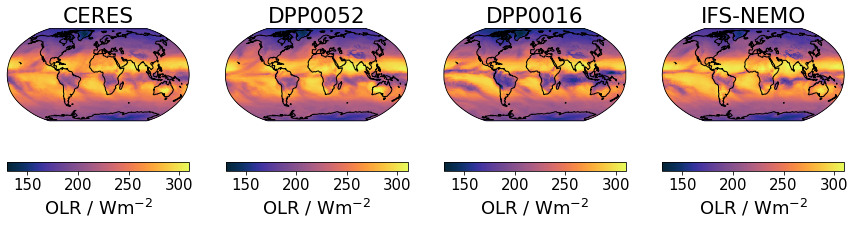

In [26]:
timestep = timestep_feb
num_cols = 4
num_rows = 1

plt.figure(figsize=(15, 5))
for i, run in enumerate(runs):
    print(run)
    lons = ds[run].lon
    lats = ds[run].lat
    lo, la = np.meshgrid(lons, lats)
    ax = plt.subplot(num_rows, num_cols, i+1, projection=ccrs.Robinson())
    ax.coastlines()
    ax.set_title(run.upper())
    im = ax.pcolormesh(lo, la, np.squeeze(scaling[run]*ds[run][rlut[run]].sel(time=timestep[run])), cmap='temperature', vmin=130, vmax=310, transform=ccrs.PlateCarree())
    
    plt.colorbar(im, label='OLR / Wm$^{-2}$', orientation='horizontal')
    

dpp0052
dpp0016


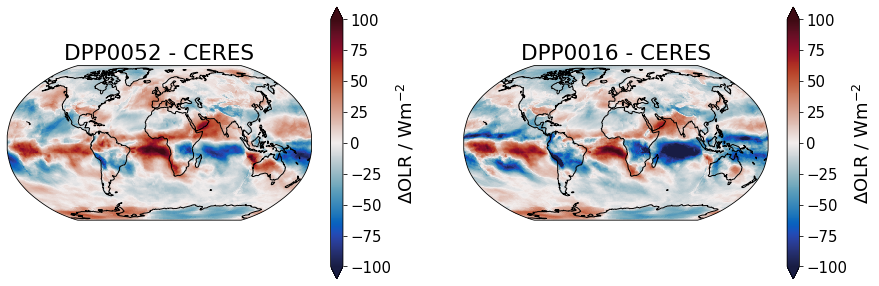

In [29]:
timestep = timestep_feb
num_cols = 2
num_rows = 1

plt.figure(figsize=(15, 5))
#for i, run in enumerate(["dpp0052", "ifs-nemo"]):
for i, run in enumerate(["dpp0052", "dpp0016"]):
    print(run)
    lons = ds[run].lon
    lats = ds[run].lat
    lo, la = np.meshgrid(lons, lats)
    ax = plt.subplot(num_rows, num_cols, i+1, projection=ccrs.Robinson())
    ax.coastlines()
    ax.set_title(f'{run.upper()} - CERES')
    im = ax.pcolormesh(lo, la, (np.squeeze(scaling[run]*ds[run][rlut[run]].sel(time=timestep[run]).values) - scaling["ceres"]*ds["ceres"][rlut["ceres"]].sel(time=timestep["ceres"])), cmap='difference', vmin=-100, vmax=100, transform=ccrs.PlateCarree())
    
    plt.colorbar(im, label='$\Delta$OLR / Wm$^{-2}$', extend='both')